# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


Primi 10 passeggeri per tariffa:
                                                 Name      Fare
737                           Lesurer, Mr. Gustave J  512.3292
679               Cardeza, Mr. Thomas Drake Martinez  512.3292
258                                 Ward, Miss. Anna  512.3292
88                        Fortune, Miss. Mabel Helen  263.0000
341                   Fortune, Miss. Alice Elizabeth  263.0000
438                                Fortune, Mr. Mark  263.0000
27                    Fortune, Mr. Charles Alexander  263.0000
742            Ryerson, Miss. Susan Parker "Suzette"  262.3750
311                       Ryerson, Miss. Emily Borie  262.3750
299  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  247.5208

Media età: 29.7
Media tariffa: 34.69
Media SibSp: 0.51

Passeggero con massimo family_index:
Name            Andersson, Miss. Erna Alexandra
Family_index                           0.757098
Name: 68, dtype: object

Passeggeri con tariffa > 100:
                            

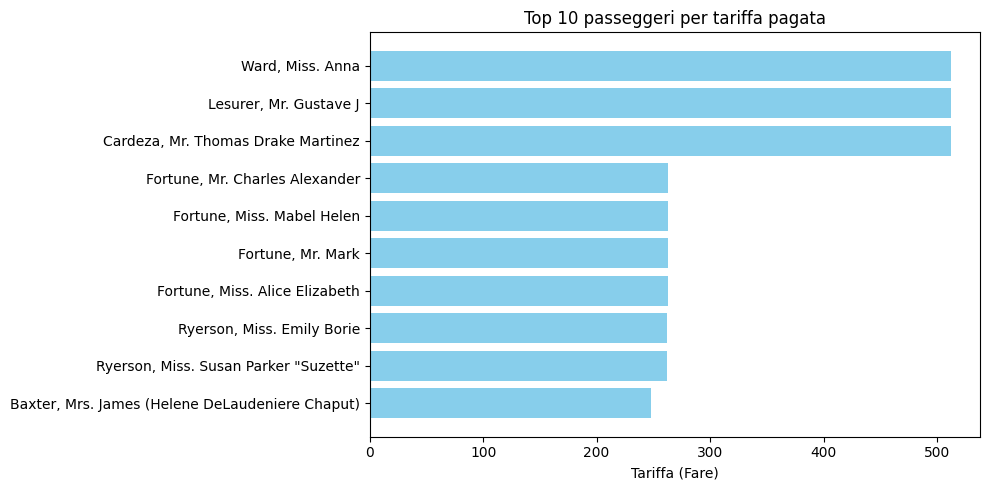

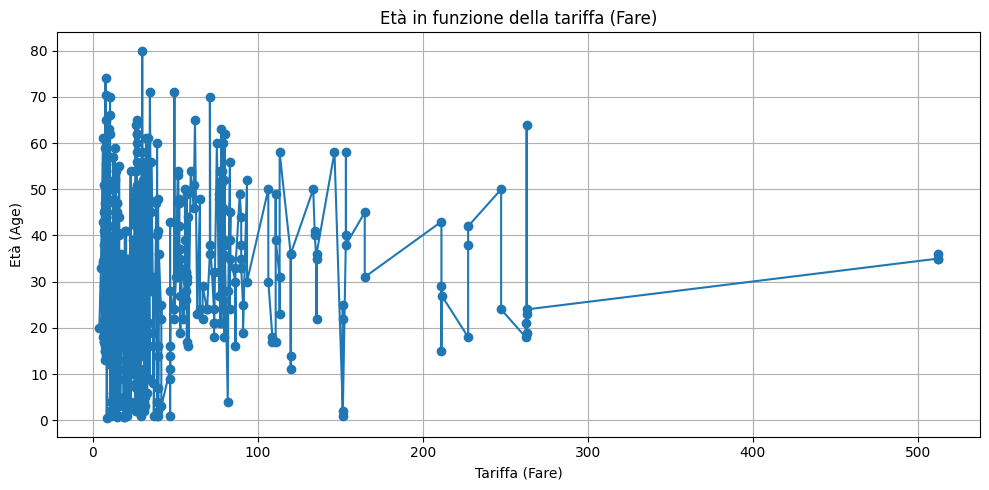

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(titanic)

# Rimuovi righe con valori NaN in colonne importanti
df = df.dropna(subset=["Age", "Fare", "SibSp", "Parch"])

# 1. Visualizza i primi 10 passeggeri ordinati per tariffa pagata (Fare), dal più alto
top10_fare = df.sort_values(by="Fare", ascending=False).head(10)
print("Primi 10 passeggeri per tariffa:\n", top10_fare[["Name", "Fare"]])

# 2. Calcola la media di Age, Fare, SibSp
print("\nMedia età:", round(df["Age"].mean(), 2))
print("Media tariffa:", round(df["Fare"].mean(), 2))
print("Media SibSp:", round(df["SibSp"].mean(), 2))

# 3. Crea la colonna family_index = (SibSp + Parch) / Fare (attenzione a divisione per zero)
df = df[df["Fare"] != 0]  # Evita divisione per zero
df["Family_index"] = (df["SibSp"] + df["Parch"]) / df["Fare"]

# 4. Trova il passeggero con valore massimo di Family_index
max_family = df.loc[df["Family_index"].idxmax()]
print("\nPasseggero con massimo family_index:")
print(max_family[["Name", "Family_index"]])

# 5. Filtra passeggeri che hanno pagato più di 100€
filtro_100 = df[df["Fare"] > 100]
print("\nPasseggeri con tariffa > 100:\n", filtro_100[["Name", "Fare"]].head())

# 6. Grafico a barre dei 10 passeggeri che hanno pagato di più
top10 = df.sort_values(by="Fare", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(top10["Name"], top10["Fare"], color="skyblue")
plt.xlabel("Tariffa (Fare)")
plt.title("Top 10 passeggeri per tariffa pagata")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. Grafico a linee dell’età ordinando per tariffa crescente
ordinati = df.sort_values(by="Fare")
plt.figure(figsize=(10, 5))
plt.plot(ordinati["Fare"], ordinati["Age"], marker="o", linestyle="-")
plt.xlabel("Tariffa (Fare)")
plt.ylabel("Età (Age)")
plt.title("Età in funzione della tariffa (Fare)")
plt.grid(True)
plt.tight_layout()
plt.show()
